In [1]:
#!pip install pycaret[full]
import pandas as pd
import pycaret
data = pd.read_csv('new_pycaret2.csv',low_memory=False)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15793 entries, 0 to 15792
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_total_listings_count  15793 non-null  int64  
 1   new_property_type          15793 non-null  object 
 2   room_type                  15793 non-null  object 
 3   accommodates               15793 non-null  int64  
 4   bathrooms_count            15793 non-null  float64
 5   Shared/Category            15793 non-null  object 
 6   bedrooms                   15793 non-null  int64  
 7   beds                       15793 non-null  int64  
 8   minimum_nights             15793 non-null  int64  
 9   maximum_nights             15793 non-null  int64  
 10  availability_30            15793 non-null  int64  
 11  neigbourhood_level         15793 non-null  int64  
 12  log_price                  15793 non-null  float64
 13  amenities_num              15793 non-null  int

In [23]:

from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'log_price', fold_shuffle=True, 
                   train_size = 0.85, normalize = True, normalize_method = 'minmax', numeric_features = ['host_total_listings_count','accommodates','bathrooms_count','bedrooms',
                                                             'beds','minimum_nights','maximum_nights','availability_30','amen_group_cleaning',
                                                             'amenities_num','amen_group_kitchen','amen_group_household','amen_group_electronics',
                                                             'amen_group_extra_spaces','amen_group_safety','amen_group_bedroom'], session_id=123)



,Description,Value
0,session_id,123
1,Target,log_price
2,Original Data,"(15793, 21)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13424, 48)"


In [24]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2729,0.1305,0.3610,0.6699,0.0650,0.0603,1.3880
lightgbm,Light Gradient Boosting Machine,0.2766,0.1335,0.3652,0.6623,0.0658,0.0612,0.1280
xgboost,Extreme Gradient Boosting,0.2792,0.1372,0.3702,0.6530,0.0666,0.0617,0.5490
rf,Random Forest Regressor,0.2816,0.1414,0.3760,0.6421,0.0677,0.0622,1.2220
gbr,Gradient Boosting Regressor,0.2901,0.1429,0.3778,0.6385,0.0681,0.0643,0.4050
et,Extra Trees Regressor,0.2883,0.1504,0.3877,0.6194,0.0698,0.0637,1.1760
ridge,Ridge Regression,0.3054,0.1578,0.3971,0.6009,0.0721,0.0680,0.0250
br,Bayesian Ridge,0.3054,0.1578,0.3971,0.6009,0.0721,0.0680,0.0550
lr,Linear Regression,0.3054,0.1579,0.3972,0.6006,0.0721,0.0680,0.0200
lar,Least Angle Regression,0.3058,0.1582,0.3976,0.5998,0.0722,0.0681,0.0190


In [25]:
#catboost = create_model('catboost')

In [26]:
#lightgbm = create_model('lightgbm')

In [27]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2865,0.1435,0.3788,0.6491,0.0685,0.0637
1,0.2617,0.1212,0.3481,0.6736,0.0629,0.0580
2,0.2868,0.1464,0.3826,0.6211,0.0693,0.0637
3,0.2825,0.1423,0.3773,0.6460,0.0678,0.0623
4,0.2764,0.1366,0.3696,0.6469,0.0669,0.0612
5,0.2801,0.1351,0.3675,0.6454,0.0660,0.0616
6,0.2868,0.1415,0.3761,0.6583,0.0673,0.0631
7,0.2742,0.1316,0.3628,0.6559,0.0659,0.0613
8,0.2790,0.1369,0.3699,0.6559,0.0658,0.0607
9,0.2781,0.1365,0.3695,0.6776,0.0661,0.0611


In [28]:
#rf = create_model('rf')

In [29]:
#tuned_catboost = tune_model(catboost, n_iter = 50)

In [30]:
#tuned_lightgbm = tune_model(lightgbm, n_iter = 50)

In [31]:
tuned_xgboost = tune_model(xgboost, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2841,0.1398,0.3739,0.6582,0.0676,0.0631
1,0.2617,0.1185,0.3443,0.6808,0.0622,0.0580
2,0.2868,0.1457,0.3817,0.6230,0.0690,0.0636
3,0.2772,0.1372,0.3705,0.6587,0.0663,0.0611
4,0.2718,0.1302,0.3608,0.6634,0.0657,0.0604
5,0.2827,0.1357,0.3683,0.6438,0.0661,0.0621
6,0.2849,0.1368,0.3699,0.6695,0.0663,0.0628
7,0.2724,0.1273,0.3568,0.6670,0.0647,0.0608
8,0.2721,0.1308,0.3616,0.6712,0.0645,0.0593
9,0.2792,0.1362,0.3690,0.6785,0.0661,0.0616


In [32]:
#tuned_rf = tune_model(rf)

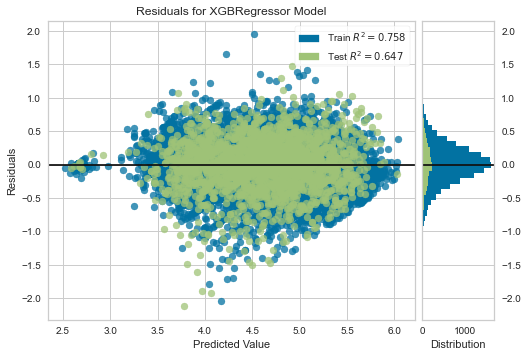

In [33]:
plot_model(tuned_xgboost)

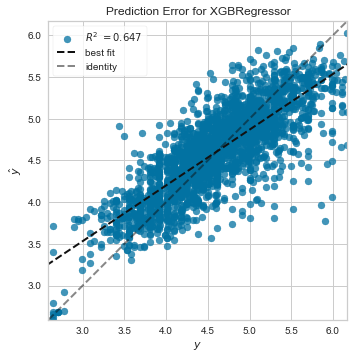

In [34]:
plot_model(tuned_xgboost, plot = 'error')

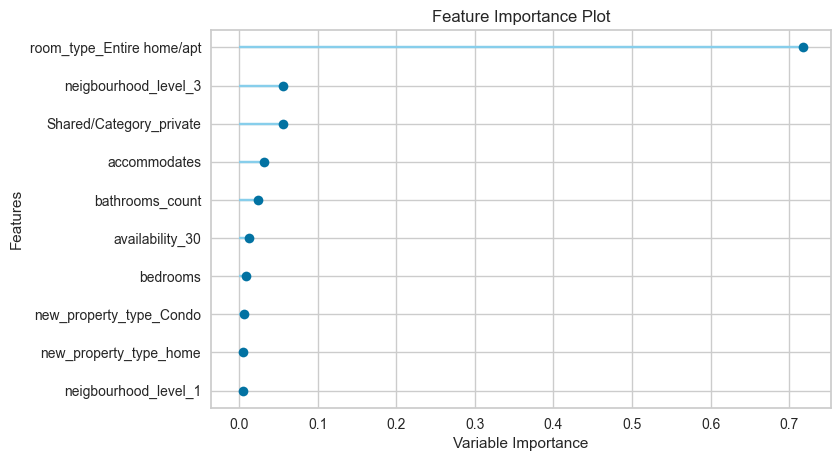

In [35]:
plot_model(tuned_xgboost, plot='feature')

In [36]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [37]:
predict_model(tuned_xgboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2799,0.1379,0.3714,0.6472,0.0664,0.0615


In [38]:
final_xgboost = finalize_model(tuned_xgboost)

In [39]:
#Final XG Boosting Machine parameters for deployment
print(final_xgboost)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.238, max_delta_step=0,
             max_depth=9, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=170, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, reg_alpha=10, reg_lambda=0.15,
             scale_pos_weight=20.200000000000003, subsample=0.7,
             tree_method='auto', validate_parameters=1, verbosity=0)


In [40]:
predict_model(final_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2368,0.0998,0.3160,0.7446,0.0565,0.0520


,host_total_listings_count,accommodates,bathrooms_count,bedrooms,beds,minimum_nights,maximum_nights,availability_30,amenities_num,amen_group_kitchen,...,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Shared/Category_private,neigbourhood_level_1,neigbourhood_level_2,neigbourhood_level_3,neigbourhood_level_4,log_price,Label
0,0.077491,0.066667,0.090909,0.111111,0.055556,0.024021,0.0364,1.000000,0.155556,0.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,5.010635,4.960578
1,0.003690,0.000000,0.090909,0.111111,0.055556,0.024021,0.1124,0.200000,0.166667,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.688879,3.505705
2,0.011070,0.400000,0.181818,0.222222,0.166667,0.024021,0.0089,0.000000,0.411111,0.363636,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.342334,5.054965
3,0.000000,0.066667,0.090909,0.000000,0.055556,0.024911,0.1124,1.000000,0.311111,0.363636,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.605170,4.630033
4,0.000000,0.266667,0.090909,0.222222,0.166667,0.024021,0.0089,0.000000,0.255556,0.090909,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.560682,4.763830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,0.000000,0.266667,0.272727,0.222222,0.166667,0.025801,0.0299,0.966667,0.244444,0.000000,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.105946,5.397060
2365,0.856089,0.066667,0.090909,0.111111,0.111111,0.024021,0.1124,0.000000,0.322222,0.272727,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.036952,5.027469
2366,0.007380,0.200000,0.090909,0.111111,0.166667,0.000890,0.0364,0.100000,0.377778,0.363636,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.010635,4.862983
2367,0.000000,0.000000,0.090909,0.111111,0.055556,0.024021,0.0199,0.000000,0.333333,0.363636,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.060443,4.183481


In [41]:
data_unseen = pd.read_csv('test.csv',low_memory=False)
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,host_total_listings_count,new_property_type,room_type,accommodates,bathrooms_count,Shared/Category,bedrooms,beds,minimum_nights,maximum_nights,...,log_price,amenities_num,amen_group_kitchen,amen_group_cleaning,amen_group_safety,amen_group_household,amen_group_bedroom,amen_group_electronics,amen_group_extra_spaces,Label
0,6,guest suite,Entire home/apt,4,1.5,private,1,3,2,30,...,4.043051,62,10,4,4,9,3,1,0,4.563665
1,2,rental unit,Entire home/apt,4,1.5,private,1,2,30,365,...,5.164786,21,1,3,0,5,0,2,1,5.020236
2,1,home,Entire home/apt,4,1.0,private,2,3,2,7,...,4.867534,53,10,5,4,8,3,1,1,4.895219
3,3,rental unit,Entire home/apt,3,1.0,private,2,2,1,1125,...,5.129899,50,8,5,3,10,3,2,1,4.780195
4,1,rental unit,Entire home/apt,4,1.0,private,1,2,21,1125,...,5.010635,31,3,1,1,9,3,2,1,4.804660


In [42]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.log_price, unseen_predictions.Label, 'R2')

0.7551

In [43]:
#save_model(final_xgboost,'model')

In [44]:
#saved_final_xgboost = load_model('model')

In [45]:
#new_prediction = predict_model(tuned_xgboost, data=data_unseen)


In [46]:
#new_prediction.head()

In [47]:
#new_prediction.info()

In [48]:
#data_unseen.shape